In [1]:
import os
from PIL import Image
import glob
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import array_to_img
import numpy as np
import csv
from random import shuffle
import matplotlib.pyplot as plt
from keras import layers
from keras import models
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
IMAGE_PATH="../COVID-CT/Images-processed/"
SPLIT_PATH="../COVID-CT/Data-split/"

In [4]:
with open(SPLIT_PATH + 'COVID/' + 'testCT_COVID.txt') as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')

In [6]:
type(csv_reader)

_csv.reader

In [3]:
def read_files(files,isCovid):
    lst=[]
    dtype=''
    fileFolder=''
    lst_img_names=[]
    img_sizes=[]
    label=0
    if isCovid == True :
        dtype='COVID/'
        fileFolder='CT_COVID/'
        label=1
    else:
        dtype='NonCOVID/'
        fileFolder='CT_NonCOVID/'
        label=0
        
        
    with open(SPLIT_PATH + dtype + files) as csv_file:
        csv_reader = csv.reader(csv_file, delimiter=',')
        line_count = 0
        for row in csv_reader:
            fname = glob.glob(IMAGE_PATH+fileFolder+row[0])
            im=load_img(fname[0],target_size=(224, 224))
            image=img_to_array(im)
            lst.append(image/255)
            lst_img_names.append(row[0])
            img_sizes.append(im.size)
            #lst.append(fname)
            
#    np_lst=np.array(lst)/255
#    lenlist=len(np_lst)
#    np_lst_reshaped=np_lst.reshape(lenlist,1)
#    flag_list=0
#    
#    if isCovid == True: 
#        flag_list=np.ones(lenlist)
#        flag_list2=flag_list.reshape(lenlist,1)
#    else:
#        flag_list=np.zeros(lenlist)
#        flag_list2=flag_list.reshape(lenlist,1)
#        
#    result_lst=np.hstack((np_lst_reshaped,flag_list2))

    return lst,lst_img_names, img_sizes
    

In [4]:
covid_test_data, covid_test_names, s1=read_files('testCT_COVID.txt',True)
noncovid_test_data, noncovid_test_names,s2=read_files('testCT_NonCOVID.txt',False)

noncovid_train_data, noncovid_train_names,s3=read_files('trainCT_NonCOVID.txt',False)
covid_train_data, covid_train_names,s4=read_files('trainCT_COVID.txt',True)

covid_valid_data, noncovid_train_names,s5=read_files('valCT_COVID.txt',True)
noncovid_valid_data, covid_train_names,s6=read_files('valCT_NonCOVID.txt',False)

test_data=np.concatenate((covid_test_data, noncovid_test_data), axis=0)
train_data=np.concatenate((covid_train_data, noncovid_train_data), axis=0)
valid_data=np.concatenate((covid_valid_data, noncovid_valid_data), axis=0)

In [5]:
test_data=covid_test_data+ noncovid_test_data
train_data=covid_train_data+ noncovid_train_data
valid_data=covid_valid_data+ noncovid_valid_data

In [6]:
test1=np.ones(len(covid_test_data))
test2=np.zeros(len(noncovid_test_data))

In [7]:
y_test=np.hstack((test1,test2))

In [8]:
train1=np.ones(len(covid_train_data))
train2=np.zeros(len(noncovid_train_data))
y_train=np.hstack((train1,train2))

In [9]:
valid1=np.ones(len(covid_valid_data))
valid2=np.zeros(len(noncovid_valid_data))
y_val=np.hstack((valid1,valid2))

In [10]:
x_test=np.array(test_data)
x_train=np.array(train_data)
x_val=np.array(valid_data)

In [11]:
#%65 başarı
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(224,224,3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dense(256, activation='relu'))
#model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 86528)            

In [13]:
from keras import optimizers

model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)


In [15]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [16]:
train_generator = train_datagen.flow(
        x_train,
        y_train,
        batch_size=16)

validation_generator = test_datagen.flow(
        x_val,
        y_val,
        batch_size=16)

In [ ]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=10,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=20)

Epoch 1/30
10/10 [==============================] - 28s 3s/step - loss: 0.6943 - acc: 0.5125 - val_loss: 0.6994 - val_acc: 0.4833
Epoch 2/30
10/10 [==============================] - 24s 2s/step - loss: 0.6838 - acc: 0.5882 - val_loss: 0.7020 - val_acc: 0.5000
Epoch 3/30
10/10 [==============================] - 25s 3s/step - loss: 0.6856 - acc: 0.5375 - val_loss: 0.6905 - val_acc: 0.5133
Epoch 4/30
10/10 [==============================] - 25s 2s/step - loss: 0.6668 - acc: 0.6000 - val_loss: 0.7650 - val_acc: 0.4862
Epoch 5/30
10/10 [==============================] - 24s 2s/step - loss: 0.6622 - acc: 0.5948 - val_loss: 0.6924 - val_acc: 0.5567
Epoch 6/30
10/10 [==============================] - 26s 3s/step - loss: 0.6543 - acc: 0.6250 - val_loss: 0.6927 - val_acc: 0.4897
Epoch 7/30
10/10 [==============================] - 25s 3s/step - loss: 0.6475 - acc: 0.6125 - val_loss: 0.6821 - val_acc: 0.5067
Epoch 8/30
10/10 [==============================] - 23s 2s/step - loss: 0.6616 - acc: 0.62

model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=[X_valid, y_valid])
score = model.evaluate(X_test, y_test)
X_new = X_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

In [25]:
results=model.evaluate(x_test,y_test)

203/203 [==============================] - 4s 18ms/step


In [26]:
results

[136.7065592047029, 0.48275861144065857]

In [16]:
history = model.fit(
      x_train,
      y_train,
      epochs=40,
      validation_data=[x_val, y_val]
)

Train on 425 samples, validate on 118 samples
Epoch 1/40
425/425 [==============================] - 40s 93ms/step - loss: 0.6938 - acc: 0.5318 - val_loss: 0.6987 - val_acc: 0.4915
Epoch 2/40
425/425 [==============================] - 36s 85ms/step - loss: 0.6829 - acc: 0.5435 - val_loss: 0.7141 - val_acc: 0.4915
Epoch 3/40
425/425 [==============================] - 36s 84ms/step - loss: 0.6813 - acc: 0.5553 - val_loss: 0.7210 - val_acc: 0.4915
Epoch 4/40
425/425 [==============================] - 36s 84ms/step - loss: 0.6684 - acc: 0.5953 - val_loss: 0.7348 - val_acc: 0.4915
Epoch 5/40
425/425 [==============================] - 36s 85ms/step - loss: 0.6634 - acc: 0.6047 - val_loss: 0.7197 - val_acc: 0.4831
Epoch 6/40
425/425 [==============================] - 36s 84ms/step - loss: 0.6361 - acc: 0.6047 - val_loss: 0.8137 - val_acc: 0.4746
Epoch 7/40
425/425 [==============================] - 36s 84ms/step - loss: 0.6238 - acc: 0.6424 - val_loss: 0.6592 - val_acc: 0.5847
Epoch 8/40
425/4

In [22]:
#history eğitim boyunca modelde neler olduğunu gösterir.
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [23]:
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1, len(loss_values)+1)

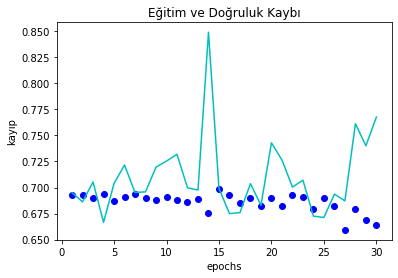

In [25]:
plt.plot(epochs,loss_values,'bo',label='Eğitim Kaybı')#bo mavi nokta
plt.plot(epochs,val_loss_values,'c',label='Doğruluk Kaybı')#b mavi düz çizgi
plt.title("Eğitim ve Doğruluk Kaybı")
plt.xlabel('epochs')
plt.ylabel('kayıp')
plt.legend
plt.show()

In [26]:
acc=history_dict['acc']
val_acc=history_dict['val_acc']

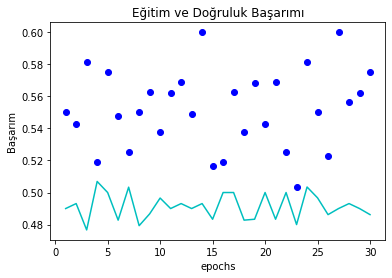

In [27]:
plt.plot(epochs,acc,'bo',label='Eğitim Başarımı')#bo mavi nokta
plt.plot(epochs,val_acc,'c',label='Doğruluk Başarımı')#b mavi düz çizgi
plt.title("Eğitim ve Doğruluk Başarımı")
plt.xlabel('epochs')
plt.ylabel('Başarım')
plt.legend
plt.show()

In [28]:
results=model.evaluate(x_test,y_test)

203/203 [==============================] - 5s 26ms/step


In [29]:
results

[0.7470608644297557, 0.48275861144065857]

In [34]:
model.save('corona_trial2.h5')

In [55]:
model.predict(x_test)

array([[8.89458239e-01],
       [1.38128519e-01],
       [9.99944925e-01],
       [3.71761650e-01],
       [9.75484312e-01],
       [9.94690478e-01],
       [9.37269390e-01],
       [1.95587240e-02],
       [7.90481354e-05],
       [9.39548700e-05],
       [2.48459969e-06],
       [8.22782822e-05],
       [6.93358898e-01],
       [1.26871439e-02],
       [1.28859766e-02],
       [3.19789723e-03],
       [1.44580826e-02],
       [8.29552054e-01],
       [8.86325002e-01],
       [4.47212875e-01],
       [1.39849439e-01],
       [4.44888622e-01],
       [1.00314446e-01],
       [8.99462819e-01],
       [9.51081336e-01],
       [6.89098954e-01],
       [9.72760856e-01],
       [2.06991568e-01],
       [9.51258898e-01],
       [4.93561178e-01],
       [9.92493212e-01],
       [2.48351052e-01],
       [4.38313603e-01],
       [9.26268280e-01],
       [3.88327315e-02],
       [9.00918424e-01],
       [7.28057802e-01],
       [3.64755064e-01],
       [9.79750574e-01],
       [8.03087056e-01],


In [11]:
from functools import partial
DefaultConv2D = partial(layers.Conv2D,
                        kernel_size=3, activation='relu', padding="SAME")

model = models.Sequential([
    DefaultConv2D(filters=64, kernel_size=7, input_shape=[224, 224, 3]),
    layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=128),
    DefaultConv2D(filters=128),
    layers.MaxPooling2D(pool_size=2),
    DefaultConv2D(filters=256),
    DefaultConv2D(filters=256),
    layers.MaxPooling2D(pool_size=2),
    layers.Flatten(),
    layers.Dense(units=128, activation='relu'),
    layers.Dense(units=64, activation='relu'),
    layers.Dense(units=1, activation='softmax'),
])

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 224, 224, 64)      9472      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 56, 56, 256)       295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 56, 56, 256)      

In [14]:
model.compile(loss="binary_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(x_train, y_train, epochs=10,batch_size=10, validation_data=[x_val, y_val])

Train on 425 samples, validate on 118 samples
Epoch 1/10
425/425 [==============================] - 261s 615ms/step - loss: 8.4423 - accuracy: 0.4494 - val_loss: 7.4954 - val_accuracy: 0.5085
Epoch 2/10
425/425 [==============================] - 260s 612ms/step - loss: 8.4423 - accuracy: 0.4494 - val_loss: 7.4954 - val_accuracy: 0.5085
Epoch 3/10
425/425 [==============================] - 262s 617ms/step - loss: 8.4423 - accuracy: 0.4494 - val_loss: 7.4954 - val_accuracy: 0.5085
Epoch 4/10
425/425 [==============================] - 258s 607ms/step - loss: 8.4423 - accuracy: 0.4494 - val_loss: 7.4954 - val_accuracy: 0.5085
Epoch 5/10
425/425 [==============================] - 258s 606ms/step - loss: 8.4423 - accuracy: 0.4494 - val_loss: 7.4954 - val_accuracy: 0.5085
Epoch 6/10
425/425 [==============================] - 10715s 25s/step - loss: 8.4423 - accuracy: 0.4494 - val_loss: 7.4954 - val_accuracy: 0.5085
Epoch 7/10
425/425 [==============================] - 259s 610ms/step - loss: 

In [21]:
#history eğitim boyunca modelde neler olduğunu gösterir.
history_dict=history.history
history_dict.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

In [22]:
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1, len(loss_values)+1)

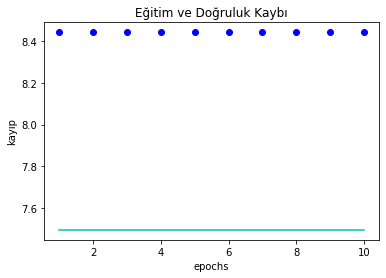

In [23]:
plt.plot(epochs,loss_values,'bo',label='Eğitim Kaybı')#bo mavi nokta
plt.plot(epochs,val_loss_values,'c',label='Doğruluk Kaybı')#b mavi düz çizgi
plt.title("Eğitim ve Doğruluk Kaybı")
plt.xlabel('epochs')
plt.ylabel('kayıp')
plt.legend
plt.show()

In [24]:
acc=history_dict['accuracy']
val_acc=history_dict['val_accuracy']

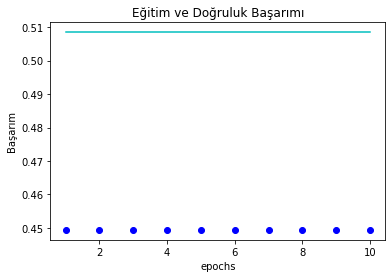

In [25]:
plt.plot(epochs,acc,'bo',label='Eğitim Başarımı')#bo mavi nokta
plt.plot(epochs,val_acc,'c',label='Doğruluk Başarımı')#b mavi düz çizgi
plt.title("Eğitim ve Doğruluk Başarımı")
plt.xlabel('epochs')
plt.ylabel('Başarım')
plt.legend
plt.show()

In [26]:
score = model.evaluate(x_test, y_test)
X_new = x_test[:10] # pretend we have new images
y_pred = model.predict(X_new)

203/203 [==============================] - 26s 126ms/step


In [28]:
score

[7.887536913303319, 0.48275861144065857]